<a href="https://colab.research.google.com/github/ludwigwittgenstein2/Research/blob/master/Name_Entity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Title: Name Entity Recognition using SPACY and BERT model 
### by Rick Rejeleene

Name Entity Recognition (NER) is an Information Extraction task in Natural Language Processing.

In this, we approach NER using SPACY and Transformer based Model, BERT

#Objective 

>a. BERT NER 

>b. SPACY NER


>We compare both with metrics. 

>c. Results/Publish

Paper link: https://docs.google.com/document/d/1cidVb2qUS_9KrUWrzngaxXPADxBz09matYFjx1RhPwY/edit

## What dataset are we using for this task? 

> U.S Census dataset 

Link for Dataset: https://drive.google.com/drive/folders/1ozzGFfKH2LFz7Gc2RZm6d4s6SYVw0jGb?usp=sharing


##How to do Name Entity Recognition on Custom Dataset using SPACY3? 

1. Dataset 
2. Spacy Library
3. Training

First We require to annotate our custom dataset: 

a. NER Annotator 

https://tecoholic.github.io/ner-annotator/

b. We require our dataset to be in txt file to be uploaded

c. In the NER annotator, apply labels that you desire 

d. Use Export Annotation to export your annotated dataset



# What's next? 

a. Once you have your training dataset

b. Use Spacy3




#Objective: SPACY NER on custom dataset

In [ ]:
! pip install -U spacy -q
!pip install torch
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import spacy
from spacy.tokens import DocBin
from tqdm import tqdm
nlp = spacy.blank("en") # load a new spacy model
db = DocBin() # create a DocBin object

## Load custom dataset 

> Upload annotation json dataset

> Re-name to training_data.json

> Run code

In [ ]:
import json
f = open('training_data.json')
TRAIN_DATA = json.load(f)

In [ ]:
for text, annot in tqdm(TRAIN_DATA['annotations']): 
    doc = nlp.make_doc(text) 
    ents = []
    for start, end, label in annot["entities"]:
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents 
    db.add(doc)

db.to_disk("./training_data.spacy") # save the docbin object

100%|██████████| 50/50 [00:00<00:00, 676.25it/s]


In [ ]:
class NerDataset(torch.utils.data.Dataset):
  """
  Custom dataset implementation to get (text,labels) tuples
  Inputs:
   - df : dataframe with columns [tags, sentence]
  """
  
  def __init__(self, df):
    if not isinstance(df, pd.DataFrame):
      raise TypeError('Input should be a dataframe')
    
    if "tags" not in df.columns or "sentence" not in df.columns:
      raise ValueError("Dataframe should contain 'tags' and 'sentence' columns")

     
    
    tags_list = [i.split() for i in df["tags"].values.tolist()]
    texts = df["sentence"].values.tolist()

    self.texts = [tokenizer(text, padding = "max_length", truncation = True, return_tensors = "pt") for text in texts]
    self.labels = [match_tokens_labels(text, tags) for text,tags in zip(self.texts, tags_list)]

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    batch_text = self.texts[idx]
    batch_labels = self.labels[idx]

    return batch_text, torch.LongTensor(batch_labels)

In [ ]:
! python -m spacy init config config.cfg --lang en --pipeline ner --optimize efficiency

⚠ To generate a more effective transformer-based config (GPU-only),
install the spacy-transformers package and re-run this command. The config
generated now does not use transformers.
ℹ Generated config template specific for your use case
- Language: en
- Pipeline: ner
- Optimize for: efficiency
- Hardware: CPU
- Transformer: None
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [ ]:
!python -m spacy train config.cfg --output ./ --paths.train ./training_data.spacy --paths.dev ./training_data.spacy

ℹ Saving to output directory: .
ℹ Using CPU
ℹ To switch to GPU 0, use the option: --gpu-id 0

=========================== Initializing pipeline ===========================
[2022-11-21 21:27:35,687] [INFO] Set up nlp object from config
INFO:spacy:Set up nlp object from config
[2022-11-21 21:27:35,708] [INFO] Pipeline: ['tok2vec', 'ner']
INFO:spacy:Pipeline: ['tok2vec', 'ner']
[2022-11-21 21:27:35,716] [INFO] Created vocabulary
INFO:spacy:Created vocabulary
[2022-11-21 21:27:35,720] [INFO] Finished initializing nlp object
INFO:spacy:Finished initializing nlp object
[2022-11-21 21:27:36,085] [INFO] Initialized pipeline components: ['tok2vec', 'ner']
INFO:spacy:Initialized pipeline components: ['tok2vec', 'ner']
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  

In [ ]:
nlp_ner = spacy.load("/content/model-best")

## Test out addresss from dataset using SPACY

>uncomment and add any input for checking

In [ ]:
#doc = nlp_ner('Mr. Breonia Adam , PhD, QC, "	"513 LANDWYCK LN, FLOWER MOUND ,TX 75028') # input sample text
doc = nlp_ner('Mr. Jasper Bauer , Jr, IQCP, 11096 GINGERWOOD WAY, RANCHO CORDOVA ,CA 95670')

In [ ]:
#doc = nlp_ner('MS. Lilly Alldredge , Jr, CLIA, 8243 WORMWOOD RD, JACKSONVILLE ,FL 32210')

In [ ]:
#doc = nlp_ner ('Mr. Madelyn Adams , Sr, CLIA, 102 HILLVIEW DR, CLOVERDALE ,CA 95425')

#Results from SPACY NER

In [ ]:
#doc = nlp_ner ('Miss Shazia Aman, Sr, Dr, 105 West HillCrest Rock Drive, Little Rock, AR, 72004')

In [ ]:
spacy.displacy.render(doc, style="ent", jupyter=True) # display in Jupyter

#Name Entity Recognition using Transformer based models

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import AutoModelForTokenClassification, AutoTokenizer
import torch

model = AutoModelForTokenClassification.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
"""
label_list = [
    "O",       # Outside of a named entity
    "B-PREFIX",  # Beginning of a miscellaneous entity right after another miscellaneous entity
    "I-GIVEN",  # Miscellaneous entity
    "B-FAMILY",   # Beginning of a person's name right after another person's name
    "I-NAME",   # Person's name
    "B-STREET",   # Beginning of an organisation right after another organisation
    "I-CITY",   # Organisation
    "B-STATE",   # Beginning of a location right after another location
    "I-ZIP"    # Location
]
"""

label_list = [
    "O",       # Outside of a named entity
    "B-PREFIX",  # Beginning of a miscellaneous entity right after another miscellaneous entity
    "I-SUFFIX_TITLE",  # Miscellaneous entity
    "B-GIVEN_NAME",   # Beginning of a person's name right after another person's name
    "B-FAMILY_NAME",   # Beginning of a person's name right after another person's name
    "I-NAME",   # Person's name
    "B-STREET_NUMBER",   # Beginning of an organisation right after another organisation
    "B-STREET_NAME",   # Beginning of an organisation right after another organisation
    "B-STREET_SUFFIX",   # Beginning of an organisation right after another organisation
    "I-CITY",   # Organisation
    "B-STATE_NAME",   # Beginning of a location right after another location
    "I-ZIP"    # Location
]

sequence = "Mr. Breonia Adam , PhD, QC, "	"513 LANDWYCK LN, FLOWER MOUND ,TX 75028"

# Bit of a hack to get the tokens with the special tokens
tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(sequence)))
inputs = tokenizer.encode(sequence, return_tensors="pt")

outputs = model(inputs)[0]
predictions = torch.argmax(outputs, dim=2)

print([(token, label_list[prediction]) for token, prediction in zip(tokens, predictions[0].tolist())])

"""
MR -> Prefix Title
BREONIA -> Given Name
ADAM -> Family Name
PHD QC -> Suffix Title
513 -> Street Number
LANDWYCK -> Street Name
LN -> Street Suffix
FLOWER MOUND -> City Name
TX -> State Name
75028 -> Zip Code

"""



[('[CLS]', 'O'), ('Mr', 'O'), ('.', 'O'), ('B', 'B-FAMILY_NAME'), ('##re', 'B-FAMILY_NAME'), ('##onia', 'B-FAMILY_NAME'), ('Adam', 'B-FAMILY_NAME'), (',', 'O'), ('PhD', 'O'), (',', 'O'), ('Q', 'O'), ('##C', 'B-STREET_SUFFIX'), (',', 'O'), ('51', 'O'), ('##3', 'O'), ('LA', 'B-STREET_SUFFIX'), ('##ND', 'B-STREET_NUMBER'), ('##W', 'B-STREET_NUMBER'), ('##Y', 'B-STREET_NUMBER'), ('##C', 'B-STREET_NUMBER'), ('##K', 'B-STREET_NUMBER'), ('L', 'O'), ('##N', 'O'), (',', 'O'), ('FL', 'O'), ('##OW', 'O'), ('##ER', 'O'), ('M', 'O'), ('##O', 'O'), ('##UN', 'O'), ('##D', 'O'), (',', 'O'), ('TX', 'B-STREET_SUFFIX'), ('750', 'O'), ('##28', 'O'), ('[SEP]', 'O')]


'\nMR -> Prefix Title\nBREONIA -> Given Name\nADAM -> Family Name\nPHD QC -> Suffix Title\n513 -> Street Number\nLANDWYCK -> Street Name\nLN -> Street Suffix\nFLOWER MOUND -> City Name\nTX -> State Name\n75028 -> Zip Code\n\n'

In [ ]:
f = open('/content/Cleaned_Simple_50.txt', 'r')
content = f.read()
print(content)

Number	Name	Address
2	"Dean. Alex Abadi , Jr, QA, "	"14646 RANCHERO RD, HESPERIA ,CA 92345"
3	"Dr. Lyla Abbatiello , Jr, CLIA, "	"517 N MOUNTAIN AVE, # 202, UPLAND ,CA 91786"
4	"Mr. Kylia Abbott , Jr, QC, "	"2731 PONKAN MEADOW DR, APOPKA ,FL 32712"
5	"Mrs. Bryce Abbott , Jr, QA, "	"237 SAINT TROPEZ LN, LINCOLN ,CA 95648"
6	"Ms. Daniela Abella , PhD, IQCP,"	"20054 CHICKEN DR, DECATUR ,AR 72722"
7	"Mr. Jacob Abraham , Jr, CLIA, "	"3006 E 17TH ST, # 6, OAKLAND ,CA 94601"
8	"Mr. Reily Acevedo , PhD, QC,"	"15123 BROOKHURST ST, APT 357, WESTMINSTER ,CA 92683"
9	"Col. Micaela Acevedo , PhD, QA, "	"1724 HORIZON HEIGHTS CIR, EL CAJON ,CA 92019"
10	"Mr. Breonia Adam , PhD, QC, "	"513 LANDWYCK LN, FLOWER MOUND ,TX 75028"
11	"Mr. Miranda Adam , Jr, QA,"	"3503 E CORNELL ST, LUBBOCK ,TX 79403"
12	"Mr. Madelyn Adams , Sr, CLIA"	"102 HILLVIEW DR, CLOVERDALE ,CA 95425"
13	"Mr. Jase Adams , PhD, QC, "	"1940 MARKET ST, FERNDALE ,CA 95536"
14	"Col. Jessica Adams , PhD, QA, "	"3120 11TH ST SW, LEHIGH ACRES

In [ ]:
#use if you want to close file
f.close()

In [ ]:
from transformers import pipeline
import pandas as pd
f = open('/content/Cleaned_Simple_50.txt', 'r')
content = f.read()

text = content

#text = 'Mr. Breonia Adam , PhD, QC, "	"513 LANDWYCK LN, FLOWER MOUND ,TX 75028'

tagger = pipeline(task='ner', aggregation_strategy='simple', grouped_entities=True)
named_ents = tagger(text)
stored_data = pd.DataFrame(named_ents)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/token_classification.py:136: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  "`grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to"


In [ ]:
print(stored_data)

   entity_group     score          word  start   end
0           PER  0.597720          Dean     23    27
1           PER  0.978966    Alex Abadi     29    39
2           PER  0.919571            Jr     42    44
3           LOC  0.654975            RA     59    61
4           ORG  0.598351    ##NCHERO R     61    69
..          ...       ...           ...    ...   ...
71          ORG  0.615709             L    988   989
72          LOC  0.381800          ##IG    991   993
73          ORG  0.581082          ACRE    995   999
74          PER  0.996841  Samuel Adams   1022  1034
75          PER  0.843554            Sr   1037  1039

[76 rows x 5 columns]


In [ ]:
#output to a CSV File
stored_data.to_csv('NER_LAbels.csv', sep='\t')

# SPACY PARSER

In [ ]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install spacy_conll 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install spacy-stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 691 kB 6.9 MB/s 
     |████████████████████████████████| 240 kB 5.7 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=5f97ee359ee09c0ae7cd472c3113bb4d80a257826c50ccd249b2f0a6f57322cb
  Stored in directory: /root/.cache/pip/wheels/f3/e3/f2/1de1c2e3ed742e1df73e0f15d58864e50c7e64f607b548d6cf
Successfully built emoji


In [ ]:
from spacy_conll import init_parser


# Initialise English parser, already including the ConllFormatter as a pipeline component.
# Indicate that we want to get the CoNLL headers in the string output.
# `use_gpu` and `verbose` are specific to stanza. These keywords arguments are passed onto their Pipeline() initialisation
nlp = init_parser("en",
                  "stanza",
                  parser_opts={"use_gpu": True, "verbose": False}, include_headers=True)
# Parse a given string
doc = nlp("Mr. Jasper Bauer , Jr, IQCP, 11096 GINGERWOOD WAY, RANCHO CORDOVA ,CA 95670")

# Get the CoNLL representation of the whole document, including headers
conll = doc._.conll_str
print(conll)


# sent_id = 1
# text = Mr. Jasper Bauer , Jr, IQCP, 11096 GINGERWOOD WAY, RANCHO CORDOVA ,CA 95670
1	Mr.	Mr.	PROPN	NNP	Number=Sing	0	root	_	_
2	Jasper	Jasper	PROPN	NNP	Number=Sing	1	flat	_	_
3	Bauer	Bauer	PROPN	NNP	Number=Sing	1	flat	_	_
4	,	,	PUNCT	,	_	1	punct	_	_
5	Jr	Jr	PROPN	NNP	Number=Sing	1	list	_	SpaceAfter=No
6	,	,	PUNCT	,	_	1	punct	_	_
7	IQCP	IQCP	PROPN	NNP	Number=Sing	1	list	_	SpaceAfter=No
8	,	,	PUNCT	,	_	1	punct	_	_
9	11096	11096	NUM	CD	NumForm=Digit|NumType=Card	7	list	_	_
10	GINGERWOOD	gingerwood	NOUN	NN	Number=Sing	11	compound	_	_
11	WAY	way	NOUN	NN	Number=Sing	1	list	_	SpaceAfter=No
12	,	,	PUNCT	,	_	1	punct	_	_
13	RANCHO	RANCHO	PROPN	NNP	Number=Sing	14	compound	_	_
14	CORDOVA	CORDOVA	PROPN	NNP	Number=Sing	1	list	_	_
15	,	,	PUNCT	,	_	16	punct	_	SpaceAfter=No
16	CA	CA	PROPN	NNP	Number=Sing	1	list	_	_
17	95670	95670	NUM	CD	NumForm=Digit|NumType=Card	1	list	_	SpaceAfter=No



In [ ]:
import spacy
from spacy.training import offsets_to_biluo_tags
from spacy.tokens import Span

print("SPACY HELPER MODEL")
base_model = "en_core_web_sm"
nlp = spacy.load(base_model)
to_disable= ['parser', 'lemmatizer', 'ner']
_ = [nlp.remove_pipe(item) for item in to_disable]
print("Base model used: ", base_model)
print("Removed components: ", to_disable)
print("Enabled components: ", nlp.pipe_names)

# Assume text is already available as sentences...
# so no need for spaCy `sentencizer` or similar
print("\nDEMO SPACY DOC LIST BUILDING...", end="")
doc1 = nlp("iPhone X is coming.")
doc1.ents = [Span(doc1, 0, 2, label="GADGET")]
doc2 = nlp("Space X is nice.")
doc2.ents = [Span(doc1, 0, 2, label="BRAND")]
docs = [doc1, doc2]
print("DONE!")

print("\nCoNLL 2003 CONVERSION:\n")
results = []
for doc in docs:
    # Preliminary: whole sentence
    whole_sentence = doc.text
    # 1st item (CoNLL 2003): word
    words = [token.text for token in doc]
    # 2nd item (CoNLL 2003): POS
    pos = [token.tag_ for token in doc]
    # 3rd item (CoNLL 2003): syntactic chunk tag
    # sct = pos  # Redundant, so will be left out
    # 4th item (CoNLL 2003): named entities
    spacy_entities = [
        (ent.start_char, ent.end_char, ent.label_)
        for ent in doc.ents
    ]
    biluo_entities = offsets_to_biluo_tags(doc, spacy_entities)
    results.append((whole_sentence, words, pos, biluo_entities))

for result in results:
    print(
        "\nDOC TEXT (NOT included in CoNLL 2003, just for demo): ",
        result[0], "\n"
    )
    print("-DOCSTART- -X- -X- O")
    for w,x,y,z in zip(result[1], result[2], result[2], result[3]):
        print(w,x,y,z)

SPACY HELPER MODEL
Base model used:  en_core_web_sm
Removed components:  ['parser', 'lemmatizer', 'ner']
Enabled components:  ['tok2vec', 'tagger', 'attribute_ruler']

DEMO SPACY DOC LIST BUILDING...DONE!

CoNLL 2003 CONVERSION:


DOC TEXT (NOT included in CoNLL 2003, just for demo):  iPhone X is coming. 

-DOCSTART- -X- -X- O
iPhone NNP NNP B-GADGET
X NNP NNP L-GADGET
is VBZ VBZ O
coming VBG VBG O
. . . O

DOC TEXT (NOT included in CoNLL 2003, just for demo):  Space X is nice. 

-DOCSTART- -X- -X- O
Space NN NN B-BRAND
X NNP NNP L-BRAND
is VBZ VBZ O
nice JJ JJ O
. . . O


In [ ]:
def print_entities(pipeline, text):
    
    # Create a document 
    document = pipeline(text)
    
    # Entity text & label extraction
    for entity in document.ents:
        print(entity.text + '->', entity.label_)
        
        
def visualize_entities(pipeline, text):
    
    # Create a document 
    document = pipeline(text)
        
    # Show entities in pretty manner
    displacy.render(document, jupyter=True, style='ent')

In [ ]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 3.1 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy
from spacy import displacy
import en_core_web_sm
nlp_sm = en_core_web_sm.load()

# Load English large model
#nlp_sm = spacy.load("en_core_web_lg")

In [ ]:
short_text = '“Amy Schneider, an engineering manager from Oakland, California, became the first woman and the fourth person on “Jeopardy!” to earn more than $1 million in winnings on Friday’s episode”.'

In [ ]:
long_text = 'Good news for consumers, undoubtedly, and good news also for investors. Apple’s recent results, covering the three months to December 31 2016, saw the company’s chief financial officer Luca Maestri announce: ‘We returned nearly $15 billion to investors through share re-purchases and dividends during the quarter.’ The quarterly dividend itself was 57 cents a share, identical to the dividend for the previous three quarters and up on the 52 cents paid for each of the four quarters before that.Business is brisk at Apple. On January 31, Tim Cook, Apple’s chief executive, said of the last three months of 2016: ‘We’re thrilled to report that our holiday quarter results generated Apple’s highest quarterly revenue ever, and broke multiple records along the way. We sold more iPhones than ever before and set all-time revenue records for iPhone, Services, Mac and Apple Watch'

In [ ]:
addresss = "Dean. Alex Abadi , Jr, QA, "	"14646 RANCHERO RD, HESPERIA ,CA 92345"

In [ ]:
print_entities(nlp_sm, short_text)

Amy Schneider-> PERSON
Oakland-> GPE
California-> GPE
first-> ORDINAL
fourth-> ORDINAL
Jeopardy-> WORK_OF_ART
more than $1 million-> MONEY
Friday-> DATE


In [ ]:
print_entities(nlp_sm, addresss)

Dean-> PERSON
Alex Abadi-> PERSON
Jr-> GPE
QA-> GPE
14646-> DATE
RD-> ORG
HESPERIA-> ORG
CA 92345-> PERSON


In [ ]:
visualize_entities(nlp_sm, addresss)

In [ ]:
visualize_entities(nlp_sm, short_text)

In [ ]:
print_entities(nlp_sm, long_text)

Apple’s-> ORG
the three months to December 31 2016-> DATE
Maestri-> PERSON
nearly $15 billion-> MONEY
the quarter-> DATE
quarterly-> DATE
57 cents-> MONEY
the previous three quarters-> DATE
52 cents-> MONEY
the four quarters-> DATE
Apple-> ORG
January 31-> DATE
Tim Cook-> PERSON
Apple’s-> ORG
the last three months of 2016-> DATE
our holiday quarter-> DATE
Apple-> ORG
quarterly-> DATE
iPhones-> ORG
iPhone, Services,-> ORG
Mac-> ORG
Apple Watch-> ORG


In [ ]:
visualize_entities(nlp_sm, short_text)

In [ ]:
!pip install punkt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement punkt (from versions: none)
ERROR: No matching distribution found for punkt


In [ ]:
import spacy
nlp=spacy.load('en_core_web_sm')
nlp.pipe_names
['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

article_text="""India that previously comprised only a handful of
 players in the e-commerce space, is now home to many biggies and giants
 battling out with each other to reach the top. This is thanks to the 
overwhelming internet and smartphone penetration coupled with the 
ever-increasing digital adoption across the country. These new-age 
innovations not only gave emerging startups a unique platform to deliver 
seamless shopping experiences but also provided brick and mortar stores 
with a level-playing field to begin their online journeys without leaving
 their offline legacies.
... European authorities fined Google a record $5.1 billion on Wednesday
 for abusing its power in the mobile phone market and ordered the company to
 alter its practices.
... Prime Minister Jacinda Ardern has claimed that New Zealand had won a 
big
battle over the spread of coronavirus. Her words came as the country begins 
to exit from its lockdown.
... never-seen transformation to the current e-commerce ecosystem while 
addressing all the existing e-commerce worries such as counterfeiting. """

In [ ]:
doc=nlp(article_text)

In [ ]:
for ent in doc.ents:
  print(ent.text,ent.label_)

India GPE
European NORP
Google ORG
$5.1 billion MONEY
Wednesday
  DATE
Jacinda Ardern PERSON
New Zealand GPE


#Name Entity Recognition using BERT 

a. We need to customize our dataset into NER.csv file


In [25]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
!pip install seqeval==0.0.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import pandas as pd
import numpy as np
from tqdm import tqdm, trange

data = pd.read_csv("ner_dataset.csv", encoding="latin1").fillna(method="ffill")
data.tail(10)

,Sentence #,Word,POS,Tag
89,Sentence: 10,27106,N,USAD_ZIP
90,Sentence: 10,27106,N,USAD_ZIP
91,Sentence: 11,2684,N,USAD_SNO
92,Sentence: 11,SAINT,W,USAD_SNM
93,Sentence: 11,JOHNS,W,USAD_SNM
94,Sentence: 11,PL,F,USAD_SFX
95,Sentence: 11,WINSTON,W,USAD_CTY
96,Sentence: 11,SALEM,W,USAD_CTY
97,Sentence: 11,NC,T,USAD_STA
98,Sentence: 11,27106,N,USAD_ZIP


In [29]:
class SentenceGetter(object):

    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None


In [30]:
class SentenceGetter(object):

    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None


In [31]:
getter = SentenceGetter(data)


In [32]:
sentences = [[word[0] for word in sentence] for sentence in getter.sentences]
sentences[0]


['1701',
 'Westpark',
 'Drive',
 'Apt',
 '110',
 'Little',
 'Rock',
 'Arkansas',
 '72204',
 '72204']

In [33]:
labels = [[s[2] for s in sentence] for sentence in getter.sentences]
print(labels[0])


['USAD_SNO', 'USAD_SNM', 'USAD_SFX', 'USAD_APN', 'USAD_ANO', 'USAD_CTY', 'USAD_CTY', 'USAD_STA', 'USAD_ZIP', 'USAD_ZIP']


In [34]:
tag_values = list(set(data["Tag"].values))
tag_values.append("PAD")
tag2idx = {t: i for i, t in enumerate(tag_values)}


In [35]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertConfig

from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

torch.__version__


'1.13.0+cu116'

In [36]:
MAX_LEN = 75
bs = 32


In [37]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()


In [38]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()


In [39]:
torch.cuda.get_device_name(0)


'Tesla T4'

In [40]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=False)


In [41]:
def tokenize_and_preserve_labels(sentence, text_labels):
    tokenized_sentence = []
    labels = []

    for word, label in zip(sentence, text_labels):

        # Tokenize the word and count # of subwords the word is broken into
        tokenized_word = tokenizer.tokenize(word)
        n_subwords = len(tokenized_word)

        # Add the tokenized word to the final tokenized word list
        tokenized_sentence.extend(tokenized_word)

        # Add the same label to the new list of labels `n_subwords` times
        labels.extend([label] * n_subwords)

    return tokenized_sentence, labels


In [42]:
a = ("John", "Charles", "Mike")
b = ("Jenny", "Christy", "Monica", "Vicky")

x = zip(a, b)

In [43]:
labels

[['USAD_SNO',
  'USAD_SNM',
  'USAD_SFX',
  'USAD_APN',
  'USAD_ANO',
  'USAD_CTY',
  'USAD_CTY',
  'USAD_STA',
  'USAD_ZIP',
  'USAD_ZIP'],
 ['USAD_SNO',
  'USAD_SNM',
  'USAD_SNM',
  'USAD_SFX',
  'USAD_CTY',
  'USAD_CTY',
  'USAD_STA',
  'USAD_ZIP',
  'USAD_ZIP'],
 ['USAD_SNO',
  'USAD_SNM',
  'USAD_SNM',
  'USAD_SFX',
  'USAD_CTY',
  'USAD_CTY',
  'USAD_STA',
  'USAD_ZIP'],
 ['USAD_SNO',
  'USAD_SNM',
  'USAD_SNM',
  'USAD_SFX',
  'USAD_CTY',
  'USAD_CTY',
  'USAD_STA',
  'USAD_ZIP',
  'USAD_ZIP'],
 ['USAD_SNO',
  'USAD_SNM',
  'USAD_SNM',
  'USAD_SFX',
  'USAD_CTY',
  'USAD_CTY',
  'USAD_STA',
  'USAD_ZIP',
  'USAD_ZIP'],
 ['USAD_SNO',
  'USAD_SNM',
  'USAD_SNM',
  'USAD_SFX',
  'USAD_CTY',
  'USAD_CTY',
  'USAD_STA',
  'USAD_ZIP',
  'USAD_ZIP'],
 ['USAD_SNO',
  'USAD_SNM',
  'USAD_SNM',
  'USAD_SFX',
  'USAD_CTY',
  'USAD_CTY',
  'USAD_STA',
  'USAD_ZIP',
  'USAD_ZIP'],
 ['USAD_SNO',
  'USAD_SNM',
  'USAD_SNM',
  'USAD_SFX',
  'USAD_CTY,',
  'USAD_CTY',
  'USAD_STA',
  'USAD_ZIP'

In [44]:
tokenized_texts_and_labels = [ tokenize_and_preserve_labels(sent, labs) 
for sent, labs in zip(sentences, labels)]


In [45]:
tokenized_texts = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels]
labels = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels]


In [46]:
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", value=0.0,
                          truncating="post", padding="post")


In [47]:
tags = pad_sequences([[tag2idx.get(l) for l in lab] for lab in labels],
                     maxlen=MAX_LEN, value=tag2idx["PAD"], padding="post",
                     dtype="long", truncating="post")


In [48]:
attention_masks = [[float(i != 0.0) for i in ii] for ii in input_ids]


In [49]:
tr_inputs, val_inputs, tr_tags, val_tags = train_test_split(input_ids, tags,
                                                            random_state=2018, test_size=0.1)
tr_masks, val_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)


In [50]:
tr_inputs = torch.tensor(tr_inputs)
val_inputs = torch.tensor(val_inputs)
tr_tags = torch.tensor(tr_tags)
val_tags = torch.tensor(val_tags)
tr_masks = torch.tensor(tr_masks)
val_masks = torch.tensor(val_masks)


In [51]:
train_data = TensorDataset(tr_inputs, tr_masks, tr_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=bs)

valid_data = TensorDataset(val_inputs, val_masks, val_tags)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=bs)


In [52]:
import transformers
from transformers import BertForTokenClassification, AdamW

transformers.__version__


'4.25.1'

In [53]:
model = BertForTokenClassification.from_pretrained(
    "bert-base-cased",
    num_labels=len(tag2idx),
    output_attentions = False,
    output_hidden_states = False
)


Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

In [54]:
model.cuda();


In [55]:
FULL_FINETUNING = True
if FULL_FINETUNING:
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.0}
    ]
else:
    param_optimizer = list(model.classifier.named_parameters())
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

optimizer = AdamW(
    optimizer_grouped_parameters,
    lr=3e-5,
    eps=1e-8
)


/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [56]:
FULL_FINETUNING = True
if FULL_FINETUNING:
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.0}
    ]
else:
    param_optimizer = list(model.classifier.named_parameters())
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

optimizer = AdamW(
    optimizer_grouped_parameters,
    lr=3e-5,
    eps=1e-8
)


In [57]:
from transformers import get_linear_schedule_with_warmup

epochs = 10
max_grad_norm = 1.0

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)


In [58]:
from seqeval.metrics import f1_score, accuracy_score


In [59]:
## Store the average loss after each epoch so we can plot them.
loss_values, validation_loss_values = [], []

for _ in trange(epochs, desc="Epoch"):
    # ========================================
    #               Training
    # ========================================
    # Perform one full pass over the training set.

    # Put the model into training mode.
    model.train()
    # Reset the total loss for this epoch.
    total_loss = 0

    # Training loop
    for step, batch in enumerate(train_dataloader):
        # add batch to gpu
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        # Always clear any previously calculated gradients before performing a backward pass.
        model.zero_grad()
        # forward pass
        # This will return the loss (rather than the model output)
        # because we have provided the `labels`.
        outputs = model(b_input_ids, token_type_ids=None,
                        attention_mask=b_input_mask, labels=b_labels)
        # get the loss
        loss = outputs[0]
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # track train loss
        total_loss += loss.item()
        # Clip the norm of the gradient
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=max_grad_norm)
        # update parameters
        optimizer.step()
        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)
    print("Average train loss: {}".format(avg_train_loss))

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)


    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    # Put the model into evaluation mode
    model.eval()
    # Reset the validation loss for this epoch.
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    predictions , true_labels = [], []
    for batch in valid_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients,
        # saving memory and speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have not provided labels.
            outputs = model(b_input_ids, token_type_ids=None,
                            attention_mask=b_input_mask, labels=b_labels)
        # Move logits and labels to CPU
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        eval_loss += outputs[0].mean().item()
        predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
        true_labels.extend(label_ids)

    eval_loss = eval_loss / len(valid_dataloader)
    validation_loss_values.append(eval_loss)
    print("Validation loss: {}".format(eval_loss))
    pred_tags = [tag_values[p_i] for p, l in zip(predictions, true_labels)
                                 for p_i, l_i in zip(p, l) if tag_values[l_i] != "PAD"]
    valid_tags = [tag_values[l_i] for l in true_labels
                                  for l_i in l if tag_values[l_i] != "PAD"]
    print("Validation Accuracy: {}".format(accuracy_score(pred_tags, valid_tags)))
    print("Validation F1-Score: {}".format(f1_score(pred_tags, valid_tags)))
    print()


Epoch:  10%|█         | 1/10 [00:03<00:27,  3.08s/it]

Average train loss: 2.4456236362457275
Validation loss: 2.203706979751587
Validation Accuracy: 0.058823529411764705
Validation F1-Score: 0

Average train loss: 2.000105619430542


Epoch:  30%|███       | 3/10 [00:03<00:05,  1.21it/s]

Validation loss: 1.8329864740371704
Validation Accuracy: 0.0
Validation F1-Score: 0

Average train loss: 1.5952931642532349
Validation loss: 1.447934627532959
Validation Accuracy: 0.0
Validation F1-Score: 0



Epoch:  50%|█████     | 5/10 [00:03<00:02,  2.38it/s]

Average train loss: 1.3926750421524048
Validation loss: 1.1944981813430786
Validation Accuracy: 0.0
Validation F1-Score: 0

Average train loss: 1.3115565776824951
Validation loss: 1.1092805862426758
Validation Accuracy: 0.0
Validation F1-Score: 0



Epoch:  70%|███████   | 7/10 [00:04<00:00,  3.57it/s]

Average train loss: 1.2417742013931274
Validation loss: 1.0701743364334106
Validation Accuracy: 0.0
Validation F1-Score: 0

Average train loss: 1.1877902746200562
Validation loss: 1.0557429790496826
Validation Accuracy: 0.0
Validation F1-Score: 0



Epoch:  90%|█████████ | 9/10 [00:04<00:00,  4.56it/s]

Average train loss: 1.1487098932266235
Validation loss: 1.0501823425292969
Validation Accuracy: 0.0
Validation F1-Score: 0

Average train loss: 1.109424352645874
Validation loss: 1.0453925132751465
Validation Accuracy: 0.0
Validation F1-Score: 0



Epoch: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]

Average train loss: 1.078658938407898
Validation loss: 1.0419052839279175
Validation Accuracy: 0.0
Validation F1-Score: 0



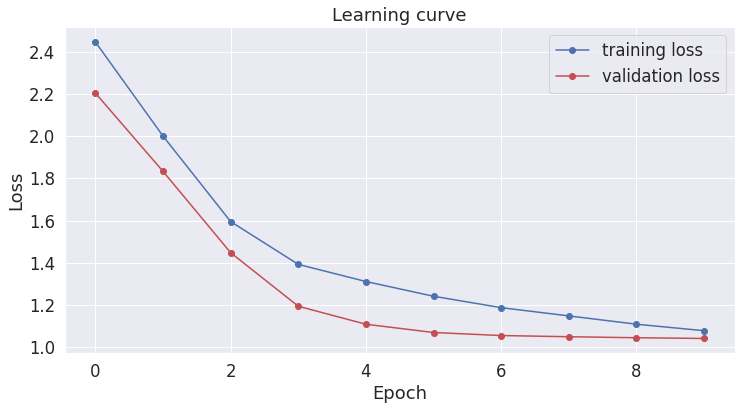

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o', label="training loss")
plt.plot(validation_loss_values, 'r-o', label="validation loss")

# Label the plot.
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [61]:
test_sentence = "Mr. Jase Adams , PhD, QC, 812 Bethabara Pointe, CIR, Winston, Salem, NC --27106 "

In [62]:
tokenized_sentence = tokenizer.encode(test_sentence)
input_ids = torch.tensor([tokenized_sentence]).cuda()


In [63]:
with torch.no_grad():
    output = model(input_ids)
label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)


In [64]:
# join bpe split tokens
tokens = tokenizer.convert_ids_to_tokens(input_ids.to('cpu').numpy()[0])
new_tokens, new_labels = [], []
for token, label_idx in zip(tokens, label_indices[0]):
    if token.startswith("##"):
        new_tokens[-1] = new_tokens[-1] + token[2:]
    else:
        new_labels.append(tag_values[label_idx])
        new_tokens.append(token)


In [65]:
for token, label in zip(new_tokens, new_labels):
    print("{}\t{}".format(label, token))


PAD	[CLS]
USAD_ANO	Mr
PAD	.
PAD	Jase
PAD	Adams
PAD	,
PAD	PhD
PAD	,
PAD	QC
PAD	,
PAD	812
PAD	Bethabara
PAD	Pointe
PAD	,
PAD	CIR
PAD	,
PAD	Winston
PAD	,
PAD	Salem
PAD	,
USAD_ANO	NC
PAD	-
PAD	-
PAD	27106
PAD	[SEP]


#NER using Simple Transformers

In [66]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 250 kB 34.9 MB/s 
     |████████████████████████████████| 451 kB 68.9 MB/s 
     |████████████████████████████████| 1.9 MB 64.7 MB/s 
     |████████████████████████████████| 9.2 MB 69.0 MB/s 
     |████████████████████████████████| 1.3 MB 66.5 MB/s 
     |████████████████████████████████| 182 kB 82.4 MB/s 
     |████████████████████████████████| 168 kB 78.0 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 168 kB 81.9 MB/s 
     |████████████████████████████████| 166 kB 73.7 MB/s 
     |████████████████████████████████| 166 kB 77.0 MB/s 
     |████████████████████████████████| 162 kB 84.8 MB/s 
     |████████████████████████████████| 162 kB 81.1 MB/s 
     |████████████████████████████████| 158 kB 83.0 MB/s 
     |████████████████████████████████| 157 kB 83.3 MB/s 
     |███████████████████████████

In [67]:
import pandas as pd
data = pd.read_csv("ner_dataset.csv",encoding="latin1" )

In [68]:
data.head(30)

,Sentence #,Word,POS,Tag
0,Sentence: 1,1701,N,USAD_SNO
1,NaN,Westpark,W,USAD_SNM
2,NaN,Drive,F,USAD_SFX
3,NaN,Apt,F,USAD_APN
4,NaN,110,N,USAD_ANO
5,NaN,Little,W,USAD_CTY
6,NaN,Rock,W,USAD_CTY
7,NaN,Arkansas,T,USAD_STA
8,NaN,72204,N,USAD_ZIP
9,NaN,NaN,NaN,NaN


In [69]:
data =data.fillna(method ="ffill")

In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [71]:
data["Sentence #"] = LabelEncoder().fit_transform(data["Sentence #"] )

In [72]:
data.head(30)

,Sentence #,Word,POS,Tag
0,0,1701,N,USAD_SNO
1,0,Westpark,W,USAD_SNM
2,0,Drive,F,USAD_SFX
3,0,Apt,F,USAD_APN
4,0,110,N,USAD_ANO
5,0,Little,W,USAD_CTY
6,0,Rock,W,USAD_CTY
7,0,Arkansas,T,USAD_STA
8,0,72204,N,USAD_ZIP
9,0,72204,N,USAD_ZIP


In [73]:
data.rename(columns={"Sentence #":"sentence_id","Word":"words","Tag":"labels"}, inplace =True)

In [74]:
data["labels"] = data["labels"].str.upper()

In [75]:
X= data[["sentence_id","words"]]
Y =data["labels"]

In [76]:
Y

0     USAD_SNO
1     USAD_SNM
2     USAD_SFX
3     USAD_APN
4     USAD_ANO
        ...   
94    USAD_SFX
95    USAD_CTY
96    USAD_CTY
97    USAD_STA
98    USAD_ZIP
Name: labels, Length: 99, dtype: object

In [77]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =0.2)

In [78]:
#building up train data and test data
train_data = pd.DataFrame({"sentence_id":x_train["sentence_id"],"words":x_train["words"],"labels":y_train})
test_data = pd.DataFrame({"sentence_id":x_test["sentence_id"],"words":x_test["words"],"labels":y_test})

In [94]:
train_data

,sentence_id,words,labels
96,2,SALEM,USAD_CTY
9,0,72204,USAD_ZIP
98,2,27106,USAD_ZIP
2,0,Drive,USAD_SFX
15,3,Clarita,USAD_CTY
...,...,...,...
11,3,High,USAD_SNM
6,0,Rock,USAD_CTY
60,8,SALEM,USAD_CTY
32,5,WINSTON,USAD_CTY


In [80]:
from simpletransformers.ner import NERModel,NERArgs

In [81]:
label = data["labels"].unique().tolist()
label

['USAD_SNO',
 'USAD_SNM',
 'USAD_SFX',
 'USAD_APN',
 'USAD_ANO',
 'USAD_CTY',
 'USAD_STA',
 'USAD_ZIP',
 'USAD_CTY,']

In [111]:
args = NERArgs()
args.num_train_epochs = 20
args.learning_rate = 1e-4
args.overwrite_output_dir =True
args.train_batch_size = 32
args.eval_batch_size = 32

In [112]:
#model = NERModel('bert', 'bert-base-uncased',labels=label,args =args)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

In [119]:
model = NERModel('roberta', 'roberta-base',labels=label,args =args)

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [120]:
test_data

,sentence_id,words,labels
53,7,27106,USAD_ZIP
36,5,27103,USAD_ZIP
74,10,SILVER,USAD_SNM
73,10,3903,USAD_SNO
13,3,Trl,USAD_SFX
37,6,2850,USAD_SNO
30,5,VINE,USAD_SNM
80,10,27101,USAD_ZIP
71,9,27101,USAD_ZIP
27,4,27106,USAD_ZIP


In [121]:
model.train_model(train_data,eval_data = test_data,acc=accuracy_score)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Running Epoch 0 of 20:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Running Epoch 1 of 20:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 2 of 20:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 3 of 20:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 4 of 20:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 5 of 20:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 6 of 20:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 7 of 20:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 8 of 20:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 9 of 20:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 10 of 20:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 11 of 20:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 12 of 20:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 13 of 20:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 14 of 20:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 15 of 20:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 16 of 20:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 17 of 20:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 18 of 20:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 19 of 20:   0%|          | 0/1 [00:00<?, ?it/s]

(20, 0.8747205480933189)

In [122]:
result, model_outputs, preds_list = model.eval_model(test_data)

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

In [123]:
result

{'eval_loss': 0.32183533906936646,
 'precision': 0.95,
 'recall': 0.95,
 'f1_score': 0.9500000000000001}

In [130]:
prediction, model_output = model.predict(["11419 SAN MINIATO AVE, BAKERSFIELD ,CA 93312"])

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

In [131]:
prediction

[[{'11419': 'USAD_SNO'},
  {'SAN': 'USAD_CTY'},
  {'MINIATO': 'USAD_SNM'},
  {'AVE,': 'USAD_SNM'},
  {'BAKERSFIELD': 'USAD_SNM'},
  {',CA': 'USAD_CTY'},
  {'93312': 'USAD_ZIP'}]]